# BANKING DATA ANALYSIS 

# Project Description
In the ever-evolving world of banking and finance, understanding customer behavior and the regional impact of transactions plays a crucial role in decision-making and strategic planning. This project, titled "Analyzing Banking Trends: Customer Transactions and Regional Impact," aims to explore and analyze the vast troves of transaction data to gain valuable insights into customer behavior patterns and their implications on different world regions.

Objective: The primary objective of this project is to delve into customer transactions and identify trends that may impact regional economies and financial systems. By combining data cleaning techniques in Python and utilizing SQL queries on a set of interconnected tables, we aim to gain a comprehensive understanding of how customer transactions vary across different regions and the possible implications on the banking sector.

Data Sources: The project leverages three key tables that provide valuable information for analysis:

1. world_regions table: This table contains data on various world regions and their corresponding codes and names. It serves as a reference to categorize customers based on their regional affiliation.

2. user_nodes table: The user_nodes table holds crucial details about consumers' banking nodes, including their unique consumer IDs, associated region IDs, node IDs, start dates, and end dates. This data enables us to identify the specific banking nodes to which customers are connected and their duration of association.

3. user_transaction table: This table is a comprehensive repository of customer transactions, containing data such as consumer IDs, transaction dates, types of transactions, and transaction amounts. Analyzing this data allows us to uncover patterns in customer spending and financial behaviors
 
All of this dataset was sourced by hicounselor(https://hicounselor.com/projects/analyzing-banking-trends-customer-transactions-and-regional-impact) as part of their materials for individuals to learn and build their portfolio

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
db_params = {
    "host": "localhost",  # or "127.0.0.1" if your database is on the local machine
    "port": 5432,         # Default PostgreSQL port
    "database": "banking_data",
    "user": "postgres",
    "password": "dibie04062000"
}


In [3]:
conn = psycopg2.connect(**db_params)


In [4]:
query = "SELECT * FROM user_nodes_cleaned;"  # Replace "your_table" with the actual table name
user_nodes = pd.read_sql_query(query, conn)


In [5]:
user_nodes

,consumer_id,region_id,node_id,start_date,end_date
0,1,3,4,2020-01-02,2020-01-03
1,2,3,5,2020-01-03,2020-01-17
2,3,5,4,2020-01-27,2020-02-18
3,4,5,4,2020-01-07,2020-01-19
4,5,3,3,2020-01-15,2020-01-23
...,...,...,...,...,...
3495,496,3,4,2020-02-25,2021-12-31
3496,497,5,4,2020-05-27,2021-12-31
3497,498,1,2,2020-04-05,2021-12-31
3498,499,5,1,2020-02-03,2021-12-31


In [6]:
user_nodes.isnull().sum()

consumer_id    0
region_id      0
node_id        0
start_date     0
end_date       0
dtype: int64

In [7]:
query = "SELECT * FROM user_transaction_cleaned;"  # Replace "your_table" with the actual table name
user_transaction = pd.read_sql_query(query, conn)


In [8]:
user_transaction

,consumer_id,transaction_date,transaction_type,transaction_amount
0,312,2020-01-20,deposit,485.0
1,376,2020-01-03,deposit,706.0
2,188,2020-01-13,deposit,601.0
3,138,2020-01-11,deposit,520.0
4,373,2020-01-18,deposit,596.0
...,...,...,...,...
5863,155,2020-01-10,deposit,712.0
5864,398,2020-01-01,deposit,196.0
5865,255,2020-01-14,deposit,563.0
5866,185,2020-01-29,deposit,626.0


In [9]:
user_transaction.isnull().sum()

consumer_id           0
transaction_date      0
transaction_type      0
transaction_amount    0
dtype: int64

In [10]:
query = "SELECT * FROM world_regions;"  # Replace "your_table" with the actual table name
world_regions = pd.read_sql_query(query, conn)

In [11]:
world_regions

,region_code,region_name
0,1,United States
1,2,Europe
2,3,Australia
3,4,Asia
4,5,Africa
5,6,Russia
6,7,China


In [12]:
world_regions.isnull().sum()

region_code    0
region_name    0
dtype: int64

# Exploratory Analysis

Task 1:List all regions along with the number of users assigned to each region.


In [13]:
query ="""SELECT
    wr.region_name AS Region,
    COUNT(DISTINCT un.consumer_id) AS NumberOfUsers
FROM
    world_regions wr
LEFT JOIN
    user_nodes_cleaned un
ON
    wr.region_code = un.region_id
GROUP BY
    wr.region_name
ORDER BY
    NumberOfUsers DESC;

"""

In [14]:
regions=  pd.read_sql_query(query, conn)

In [15]:
regions 

,region,numberofusers
0,United States,110
1,Europe,105
2,Australia,102
3,Asia,95
4,Africa,88
5,China,0
6,Russia,0


In [16]:
#conn.close()

Text(0.5, 1.0, 'Number of Users by Region')

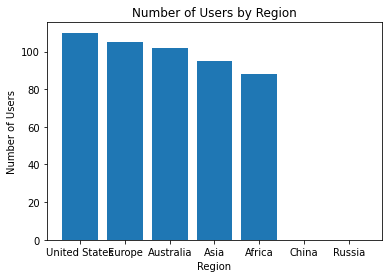

In [17]:
plt.bar(x=regions['region'], height=regions['numberofusers'])
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.title('Number of Users by Region')


In [18]:
region_name = regions['region']

In [19]:
num_users = regions['numberofusers']

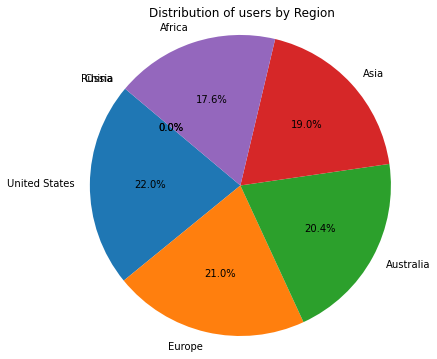

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(num_users, labels=region_name, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of users by Region')
plt.axis('equal')  
plt.show()

Based on my analysis, it is evident that the United States has the highest number of users for this bank, while the lowest number of users can be found in Russia and China, respectively.

Task 2:
Find the user who made the largest deposit amount and the transaction type for that deposit.

In [21]:
query = """SELECT consumer_id,transaction_type,transaction_amount FROM user_transaction_cleaned WHERE transaction_amount = (select MAX(transaction_amount) from user_transaction_cleaned);
"""

In [22]:
largest_amount= pd.read_sql_query(query, conn)

In [23]:
largest_amount

,consumer_id,transaction_type,transaction_amount
0,218,deposit,1000.0
1,219,deposit,1000.0


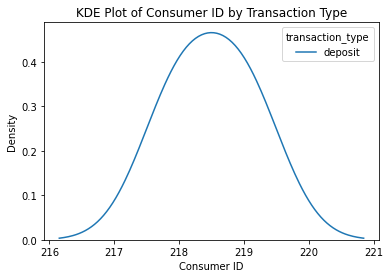

In [24]:
sns.kdeplot(data=largest_amount, x='consumer_id', hue='transaction_type', common_norm=False)
plt.title("KDE Plot of Consumer ID by Transaction Type")
plt.xlabel("Consumer ID")
plt.ylabel("Density")
plt.show()

The customers with the highest single deposit amounts are customer IDs 218 and 219, respectively. They both carried out deposit transactions  of $1000 in their respective currencies, This is the highest single day deposit the bank has recorded in all it regions 

Task 3: 
Calculate the total amount deposited for each user in the "Europe" region.

In [25]:
query ="""SELECT ut.consumer_id AS user, SUM(ut.transaction_amount) AS total_amount_deposited
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'Europe'
GROUP BY ut.consumer_id
ORDER BY total_amount_deposited desc;
"""

In [26]:
europe_deposit= pd.read_sql_query(query, conn)

In [27]:
europe_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0
...,...,...
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0


In [28]:
highset_total_deposit = europe_deposit.head(5)

In [29]:
highset_total_deposit

,user,total_amount_deposited
0,197,87563.0
1,281,86184.0
2,76,77889.0
3,275,77049.0
4,110,76447.0


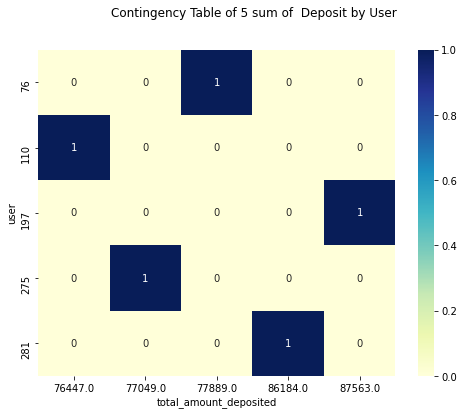

In [30]:
contingency_table = pd.crosstab(highset_total_deposit["user"], highset_total_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of 5 sum of  Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

Customers with user IDs 281, 275, 197, 110, and 76 collectively made the highest number of deposits in the European region over the years 2020 and 2021. Their total deposits amounted to an impressive sum of 404,802, establishing them as the bank's most significant customers.

In [31]:
lowest_total_deposit = europe_deposit.tail(5)

In [32]:
lowest_total_deposit

,user,total_amount_deposited
100,62,8393.0
101,263,8190.0
102,99,8127.0
103,162,8092.0
104,133,6482.0


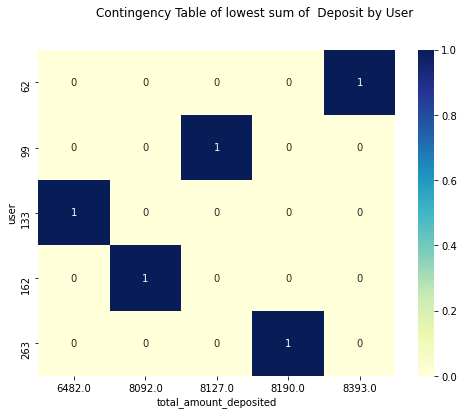

In [33]:
contingency_table = pd.crosstab(lowest_total_deposit["user"], lowest_total_deposit["total_amount_deposited"])
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Contingency Table of lowest sum of  Deposit by User')
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
fig.savefig('user_transactions_heatmap.jpg', dpi=300)
plt.show()

In contrast, customers with user IDs 263, 162, 133, 99, and 62 had the smallest cumulative deposit amounts in the European region over the course of the years 2020 and 2021. Collectively, their total deposits amounted to a considerably lower sum of 39,284. This indicates that they have made fewer and smaller deposits compared to the bank's more substantial customers in the region.

TASK 4:
Calculate the total number of transactions made by each user in the "United States" region.

In [34]:
query = """SELECT ut.consumer_id AS user, COUNT(ut.consumer_id) AS total_transactions
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned ur ON ut.consumer_id = ur.consumer_id
JOIN world_regions wr ON wr.region_code = ur.region_id
WHERE wr.region_name = 'United States'
GROUP BY ut.consumer_id
ORDER BY total_transactions DESC;
"""

In [35]:
usa_transaction = pd.read_sql_query(query,conn)

In [36]:
usa_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
...,...,...
105,114,21
106,79,21
107,84,14
108,15,14


In [37]:
highset_transaction = usa_transaction.head(10)

In [38]:
highset_transaction

,user,total_transactions
0,69,154
1,284,154
2,37,154
3,161,147
4,462,147
5,422,147
6,102,147
7,344,147
8,442,147
9,283,140


In [39]:
lowest_transaction = usa_transaction.tail(10)

In [40]:
lowest_transaction 

,user,total_transactions
100,204,28
101,12,28
102,137,28
103,71,28
104,455,21
105,114,21
106,79,21
107,84,14
108,15,14
109,73,14


In the United States, the highest number of transactions conducted over the years 2020 and 2021 was 154, while the lowest number of transactions recorded was just 14

Task 5:
Find the regions with the highest number of nodes assigned to them.


In [41]:
query = """SELECT wr.region_name, COUNT(un.node_id) AS num_nodes
FROM user_nodes_cleaned un
JOIN world_regions wr ON wr.region_code = un.region_id
GROUP BY wr.region_name
ORDER BY num_nodes DESC;

"""

In [42]:
region_with_highest_nodes = pd.read_sql_query(query,conn)

In [43]:
region_with_highest_nodes

,region_name,num_nodes
0,United States,770
1,Europe,735
2,Australia,714
3,Asia,665
4,Africa,616


In [44]:
region_names = region_with_highest_nodes['region_name']
num_nodes = region_with_highest_nodes['num_nodes']

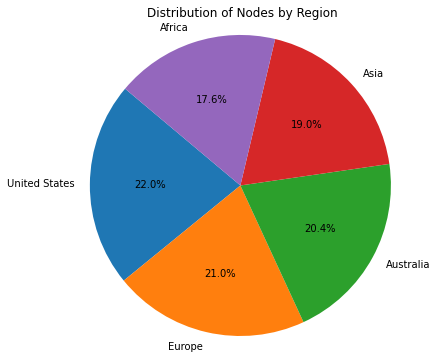

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(num_nodes, labels=region_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Nodes by Region')
plt.axis('equal')  
plt.show()

The data shows that the "United States" has the most banking locations, with 770 nodes. Europe is a close second with 735 nodes, and Australia isn't far behind with 714 nodes. Meanwhile, Asia has 665 nodes, and Africa has the fewest, with 616 nodes.

This information helps us understand where the bank's locations are concentrated. It's interesting to note that the United States has the most, indicating that the bank has a strong presence there. This means that customers in the United States have many places to access the bank's services, making it convenient for them. This strategy in the U.S. market shows the bank's commitment to serving customers effectively.

Task 6: Calculate the total amount deposited by each user in each region.

In [46]:
query = """SELECT wr.region_name, SUM(ut.transaction_amount) as total_deposit
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
WHERE ut.transaction_type = 'deposit'
GROUP BY wr.region_name
ORDER BY wr.region_name DESC;
"""


In [47]:
deposit_per_region = pd.read_sql_query(query,conn)

In [48]:
deposit_per_region

,region_name,total_deposit
0,United States,2078069.0
1,Europe,2120503.0
2,Australia,1851703.0
3,Asia,1853110.0
4,Africa,1610791.0


Text(0.5, 1.0, 'total_deposit by Region')

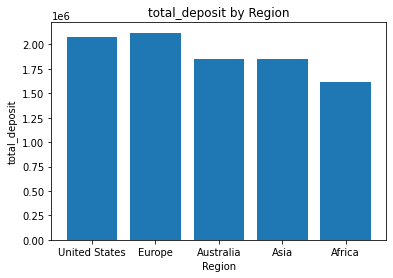

In [49]:
plt.bar(x=deposit_per_region['region_name'], height=deposit_per_region['total_deposit'])
plt.xlabel('Region')
plt.ylabel('total_deposit')
plt.title('total_deposit by Region')


This results show the total deposit amounts for different regions based on "deposit" transactions:

United States: Customers in the United States have collectively deposited $2,078,069.0, reflecting a substantial presence and activity in this region.

Europe: Europe follows closely with a total deposit of $2,120,503.0, indicating a strong customer base and banking activity.

Australia: The bank has received deposits totaling $1,851,703.0 from customers in Australia, demonstrating a solid financial presence in this region.

Asia: Asia shows a total deposit of $1,853,110.0, highlighting significant banking engagement.

Africa: Customers in Africa have deposited $1,610,791.0, representing a notable but slightly lower deposit total.


These figures provide valuable insights for the bank in multiple critical areas. Firstly, they shed light on regional performance by revealing how each region contributes to the bank's overall deposit portfolio, enabling the assessment of regional success. Secondly, the data plays a pivotal role in resource allocation, guiding the bank in deciding where to focus its efforts to attract more deposits effectively. Furthermore, it informs strategic decisions, like whether to grow in some areas, combine efforts in others, or make special products or services tailored to the unique needs of different regions. Lastly, the information prompts a closer examination of customer behavior and preferences across various regions, ultimately leading to the provision of more tailored and customer-centric services.

Task 7: Retrieve the total number of all  transactions for each region.

In [50]:
query = """SELECT COUNT(ut.consumer_id) as num_transactions, wr.region_name
FROM user_transaction_cleaned ut
JOIN user_nodes_cleaned un ON ut.consumer_id = un.consumer_id
JOIN world_regions wr ON un.region_id = wr.region_code
GROUP BY wr.region_name;
"""

In [51]:
transactions_per_region = pd.read_sql_query(query,conn)

In [52]:
transactions_per_region

,num_transactions,region_name
0,9107,United States
1,8414,Australia
2,6797,Africa
3,7952,Asia
4,8806,Europe


Text(0.5, 1.0, 'Number of transaction by Region')

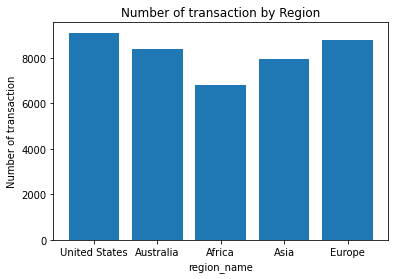

In [53]:
plt.bar(x=transactions_per_region['region_name'], height=transactions_per_region['num_transactions'])
plt.xlabel('region_name')
plt.ylabel('Number of transaction')
plt.title('Number of transaction by Region')


The data provides a broad view of transactions across different regions, including withdrawals, deposits, and purchases. Each region has its own way of using these transaction types:

United States: With 9,107 transactions, it's clear that people in the U.S. use a variety of financial services, like withdrawing, depositing, and purchasing. This shows that the U.S. has a diverse banking landscape, catering to different customer needs.

Australia: Australia, with 8,414 transactions, also has a thriving financial environment. Here, people rely on various transaction types to meet their financial requirements, indicating a flexible banking system.

Africa: Africa, recording 6,797 transactions, highlights the importance of different transaction types for its unique financial needs. This underscores the role of accessible banking services for various purposes.

Asia: In Asia, where there are 7,952 transactions, people engage in a wide range of financial activities. This emphasizes the usefulness of different transaction types to meet diverse customer demands.

Europe: Europe, with 8,806 transactions, caters to various financial needs, showcasing the adaptability of different transaction types to address a range of customer requests.

Task 8: How many consumers are allocated to each region?










In [54]:
query = """SELECT wr.region_name, wr.region_code, Count( un.consumer_id)
FROM user_nodes_cleaned as un
LEFT JOIN world_regions as wr ON un.region_id = wr.region_code
GROUP BY wr.region_name, wr.region_code;

"""

In [55]:
consumers_per_region = pd.read_sql(query,conn)

In [56]:
consumers_per_region

,region_name,region_code,count
0,Africa,5,616
1,United States,1,770
2,Asia,4,665
3,Australia,3,714
4,Europe,2,735


In [57]:
region_names = consumers_per_region['region_name']
region_codes = consumers_per_region['region_code']
count = consumers_per_region['count']

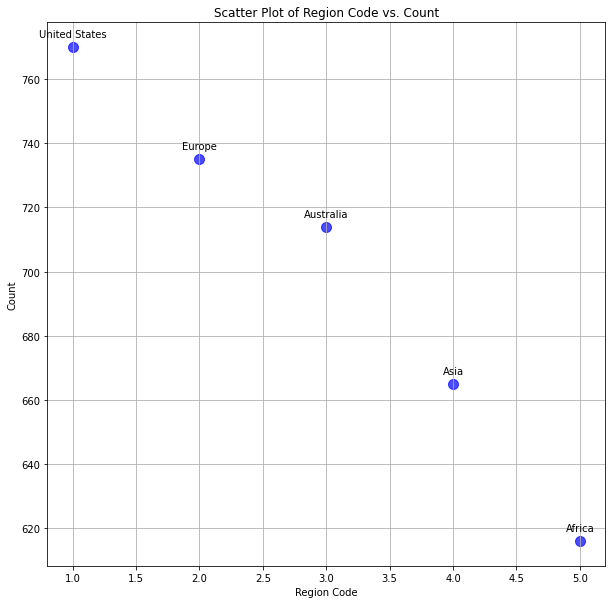

In [58]:
plt.figure(figsize=(10, 10))
plt.scatter(region_codes, count, c='blue', marker='o', s=100, alpha=0.7)
plt.title('Scatter Plot of Region Code vs. Count')
plt.xlabel('Region Code')
plt.ylabel('Count')
for i in range(len(region_names)):
    plt.annotate(region_names[i], (region_codes[i], count[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.grid(True)
plt.show()

This results  provide a clear picture of the number of customers allocated to each region, which is crucial for the bank's understanding of its customer distribution. When we relate this visuals to the analysis of banking nodes we conducted earlier, it becomes evident that regions with a higher count of consumers often coincide with regions that had a more extensive network of banking nodes. For instance, the United States, with the highest count of consumers at 770, aligns with the earlier findings of an extensive banking node network, highlighting the strong presence and customer activity in this region. Similarly, Europe's 735 consumers correlate with the significant number of banking nodes, indicating a robust financial environment with diverse services. The number of consumers in Australia, Asia, and Africa also corresponds with the banking activity we observed in those regions. In essence, this data reaffirms the importance of adapting banking services to meet the specific needs of each region's customer base, as reflected in both the number of consumers and the presence of banking nodes.







Task 9: What is the unique count and total amount for each transaction type?

In [59]:
query = """SELECT COUNT(DISTINCT consumer_id), SUM(transaction_amount), transaction_type
FROM user_transaction_cleaned
GROUP BY transaction_type
ORDER BY SUM(transaction_amount);
"""

In [60]:
amount_per_transactiontype = pd.read_sql_query(query,conn)

In [61]:
amount_per_transactiontype

,count,sum,transaction_type
0,439,793003.0,withdrawal
1,448,806537.0,purchase
2,500,1359168.0,deposit


In [62]:
sum_amount = amount_per_transactiontype['sum']
transaction_type = amount_per_transactiontype['transaction_type']
count =amount_per_transactiontype['count']

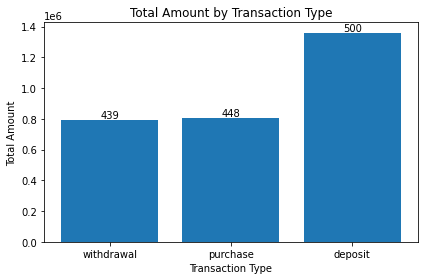

In [63]:
plt.bar(transaction_type, sum_amount)
for i, v in enumerate(count):
    plt.text(i, sum_amount[i], str(v), ha='center', va='bottom')
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Total Amount by Transaction Type")
plt.tight_layout()
plt.show()

this  results  show the unique count and total amount for each transaction type across all regions:

Withdrawals: There were a total of 439 unique instances of withdrawal transactions, amounting to $793,003.0. This suggests that withdrawals are a commonly performed transaction type. For the bank, it indicates that customers frequently need access to their funds, and it's crucial to maintain sufficient liquidity in the branches or ATMs to accommodate these requests. It also highlights that customers rely on the bank for cash access.

Purchases: There were 448 unique instances of purchase transactions, totaling $806,537.0. This signifies that purchases are also a frequently performed transaction type. For the bank, it implies a significant number of customers using their accounts or cards for buying goods and services, which may result in transaction fees or interchange revenue for the bank.

Deposits: There were 500 unique instances of deposit transactions, with a total amount of $1,359,168.0. This data reveals that deposits are a common transaction type, indicating that customers are actively putting money into their accounts. For the bank, this reflects a stable influx of funds, potentially available for lending or investment

Task 10: What are the average deposit counts and amounts for each transaction type ('deposit') across all customers, grouped by transaction type?




In [64]:
query ="""
WITH DepositSummary AS (
    SELECT
        transaction_type,
        consumer_id,
        COUNT(transaction_type) AS TotalDepositCounts,
        SUM(transaction_amount) AS TotalDepositAmount
    FROM user_transaction_cleaned
    WHERE transaction_type = 'deposit'
    GROUP BY transaction_type, consumer_id
)

SELECT
    transaction_type,
    ROUND(AVG(TotalDepositCounts), 0) AS AvgDepositCounts,
    ROUND(AVG(TotalDepositAmount), 0) AS AvgDepositAmount
FROM DepositSummary
GROUP BY transaction_type;
"""

In [65]:
deposit_summary = pd.read_sql_query(query,conn)

In [66]:
deposit_summary

,transaction_type,avgdepositcounts,avgdepositamount
0,deposit,5.0,2718.0


For every region of the bank, on average, each customer makes about 5 deposit transactions, and the average amount deposited in each of these transactions is around $2,718. This signifies that customers regularly use the deposit services, contributing substantial amounts to their accounts with each transaction. It's a positive sign, reflecting trust in the bank's services and the availability of substantial funds for the bank's operations.

# customer behaviour 

i  want to know if they are  customers who have churned, defined as those who have not made any transactions at all be it deposit, withdrawal or purchase  in any region as of the end of 2020 and are labeled as "churned." Churned customers are those with a last transaction date before January 1, 2021.

In [67]:
query = """SELECT
    un.consumer_id,
    un.start_date AS customer_start_date,
    un.end_date AS customer_end_date,
    MAX(ut.transaction_date) AS last_transaction_date
FROM user_nodes_cleaned un
LEFT JOIN user_transaction_cleaned ut ON un.consumer_id = ut.consumer_id
GROUP BY un.consumer_id, un.start_date, un.end_date
HAVING
    (un.end_date IS NOT NULL AND MAX(ut.transaction_date) < '2021-01-01')
    OR (un.end_date IS NULL AND MAX(ut.transaction_date) < '2021-01-01');

"""

In [68]:
churned_customers = pd.read_sql_query(query,conn)

In [69]:
churned_customers

,consumer_id,customer_start_date,customer_end_date,last_transaction_date
0,305,2020-03-06,2020-03-25,2020-03-22
1,141,2020-01-15,2020-01-29,2020-04-04
2,1,2020-01-29,2020-02-18,2020-03-19
3,145,2020-03-20,2020-04-03,2020-03-24
4,464,2020-03-24,2020-04-10,2020-04-11
...,...,...,...,...
3495,219,2020-03-22,2020-04-07,2020-04-03
3496,463,2020-03-12,2020-04-09,2020-04-16
3497,340,2020-02-18,2020-03-06,2020-04-01
3498,119,2020-01-17,2020-02-06,2020-04-10


my data shows that a total of a total of 3,499 people have churned

#  further analysis to discover the patterns for this churn 

In [70]:
from datetime import datetime, timedelta

In [71]:
query = """SELECT un.*, ut.*, wr.*
FROM user_nodes_cleaned un
LEFT JOIN user_transaction_cleaned ut ON un.consumer_id = ut.consumer_id
LEFT JOIN world_regions wr ON un.region_id = wr.region_code;

"""

In [72]:
data = pd.read_sql_query(query,conn)

In [73]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name
0,312,5,2,2020-04-24,2021-12-31,312,2020-01-20,deposit,485.0,5,Africa
1,312,5,4,2020-04-01,2020-04-23,312,2020-01-20,deposit,485.0,5,Africa
2,312,5,3,2020-03-16,2020-03-31,312,2020-01-20,deposit,485.0,5,Africa
3,312,5,4,2020-02-21,2020-03-15,312,2020-01-20,deposit,485.0,5,Africa
4,312,5,5,2020-02-09,2020-02-20,312,2020-01-20,deposit,485.0,5,Africa
...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-01-13,deposit,995.0,5,Africa
41072,309,5,4,2020-02-28,2020-03-02,309,2020-01-13,deposit,995.0,5,Africa
41073,309,5,1,2020-02-27,2020-02-27,309,2020-01-13,deposit,995.0,5,Africa
41074,309,5,1,2020-02-07,2020-02-26,309,2020-01-13,deposit,995.0,5,Africa


In [74]:
data['end_date'] = pd.to_datetime(data['end_date'])
data['start_date'] = pd.to_datetime(data['start_date'])
data['transaction_date'] = pd.to_datetime(data['start_date'])

In [75]:
end_date = datetime(2020, 12, 31)  
start_date = datetime(2020, 1, 1)
transaction_date = datetime(2020,12,31)

Customers with a defined end date (i.e., un.end_date IS NOT NULL) and whose end date falls on or before December 31, 2020, are classified as "churned." This indicates that their last transaction date occurred on or before December 31, 2020.

Likewise, customers without a defined end date (i.e., un.end_date IS NULL) and whose last transaction date is on or before December 31, 2020, are also categorized as "churned." In essence, these customers ceased transacting with the bank by the conclusion of 2020, and they were not retained as active customers in 2021.

In [76]:
from datetime import datetime

def label_churn(row):
    if pd.isnull(row['end_date']):
        return 'churned'  # No end date, consider churned
    if row['end_date'] <= end_date and pd.to_datetime(row['transaction_date']) <= transaction_date:
        return 'active'  # Last transaction date is within the dataset period
    return 'churned'  # Customer is churned based on the dataset period

In [77]:
data['churn'] = data.apply(label_churn, axis=1)

In [78]:
data

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name,churn
0,312,5,2,2020-04-24,2021-12-31,312,2020-04-24,deposit,485.0,5,Africa,churned
1,312,5,4,2020-04-01,2020-04-23,312,2020-04-01,deposit,485.0,5,Africa,active
2,312,5,3,2020-03-16,2020-03-31,312,2020-03-16,deposit,485.0,5,Africa,active
3,312,5,4,2020-02-21,2020-03-15,312,2020-02-21,deposit,485.0,5,Africa,active
4,312,5,5,2020-02-09,2020-02-20,312,2020-02-09,deposit,485.0,5,Africa,active
...,...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-03-03,deposit,995.0,5,Africa,active
41072,309,5,4,2020-02-28,2020-03-02,309,2020-02-28,deposit,995.0,5,Africa,active
41073,309,5,1,2020-02-27,2020-02-27,309,2020-02-27,deposit,995.0,5,Africa,active
41074,309,5,1,2020-02-07,2020-02-26,309,2020-02-07,deposit,995.0,5,Africa,active


# Distribution for churn 

In [79]:
data['churn'].value_counts()

active     35212
churned     5864
Name: churn, dtype: int64

In [80]:
data['churn'].value_counts(normalize=True)


active     0.85724
churned    0.14276
Name: churn, dtype: float64

The bank entered 2021 with approximately 85.72% of its customers retained, while approximately 14.28% of customers had churned by the end of 2020

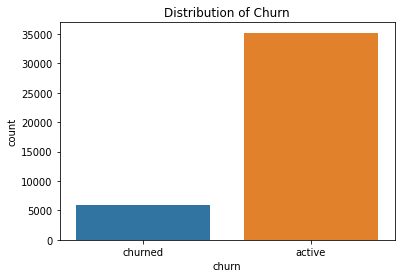

In [81]:
sns.countplot(data=data, x="churn")
plt.title("Distribution of Churn")
plt.show()

generally this dataset contains a higher number of active customers as of 2021 , we can say that this bank has a good retention rate 

# creating a subset for churn to help for more visualization 

In [82]:
churn = data[data['churn'] == 'churned']


In [83]:
churn

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name,churn
0,312,5,2,2020-04-24,2021-12-31,312,2020-04-24,deposit,485.0,5,Africa,churned
7,376,5,1,2020-04-16,2021-12-31,376,2020-04-16,deposit,706.0,5,Africa,churned
14,188,1,3,2020-04-08,2021-12-31,188,2020-04-08,deposit,601.0,1,United States,churned
21,138,4,2,2020-05-16,2021-12-31,138,2020-05-16,deposit,520.0,4,Asia,churned
28,373,5,2,2020-05-10,2021-12-31,373,2020-05-10,deposit,596.0,5,Africa,churned
...,...,...,...,...,...,...,...,...,...,...,...,...
41041,155,4,3,2020-05-13,2021-12-31,155,2020-05-13,deposit,712.0,4,Asia,churned
41048,398,3,3,2020-04-11,2021-12-31,398,2020-04-11,deposit,196.0,3,Australia,churned
41055,255,4,2,2020-05-10,2021-12-31,255,2020-05-10,deposit,563.0,4,Asia,churned
41062,185,5,1,2020-05-13,2021-12-31,185,2020-05-13,deposit,626.0,5,Africa,churned


In [84]:
active =data[data['churn'] == 'active']


In [85]:
active

,consumer_id,region_id,node_id,start_date,end_date,consumer_id,transaction_date,transaction_type,transaction_amount,region_code,region_name,churn
1,312,5,4,2020-04-01,2020-04-23,312,2020-04-01,deposit,485.0,5,Africa,active
2,312,5,3,2020-03-16,2020-03-31,312,2020-03-16,deposit,485.0,5,Africa,active
3,312,5,4,2020-02-21,2020-03-15,312,2020-02-21,deposit,485.0,5,Africa,active
4,312,5,5,2020-02-09,2020-02-20,312,2020-02-09,deposit,485.0,5,Africa,active
5,312,5,2,2020-02-08,2020-02-08,312,2020-02-08,deposit,485.0,5,Africa,active
...,...,...,...,...,...,...,...,...,...,...,...,...
41071,309,5,5,2020-03-03,2020-03-11,309,2020-03-03,deposit,995.0,5,Africa,active
41072,309,5,4,2020-02-28,2020-03-02,309,2020-02-28,deposit,995.0,5,Africa,active
41073,309,5,1,2020-02-27,2020-02-27,309,2020-02-27,deposit,995.0,5,Africa,active
41074,309,5,1,2020-02-07,2020-02-26,309,2020-02-07,deposit,995.0,5,Africa,active


In [86]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])


In [87]:
numerical_columns

,consumer_id,region_id,node_id,consumer_id,transaction_amount,region_code
0,312,5,2,312,485.0,5
1,312,5,4,312,485.0,5
2,312,5,3,312,485.0,5
3,312,5,4,312,485.0,5
4,312,5,5,312,485.0,5
...,...,...,...,...,...,...
41071,309,5,5,309,995.0,5
41072,309,5,4,309,995.0,5
41073,309,5,1,309,995.0,5
41074,309,5,1,309,995.0,5


# visualizing customer behavior

visualizing customer churn against customer region code 

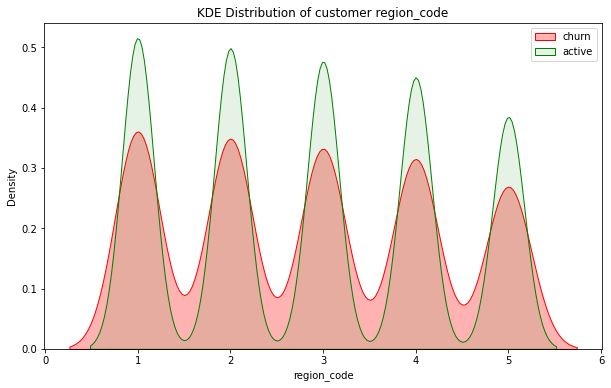

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.kdeplot(x='region_code', data=churn, color='red', ax=ax, fill=True, alpha=.3, label='churn')
sns.kdeplot(x='region_code', data=active, color='green', ax=ax, fill=True, alpha=.1, label='active')
plt.title('KDE Distribution of customer region_code') 
plt.xlabel('region_code')
plt.legend()
plt.show()

The scatter plot analysis reveals an interesting trend among different regions. In this analysis, it's evident that each region managed to retain more customers than they lost, indicating a positive overall customer retention strategy. However, the data also highlights that Region 5, which corresponds to Africa, had the lowest number of retained customers while the united state that corresponds with Region 1 has the higest retention rate .

This finding can be significant for the bank as it suggests that while their overall customer retention strategy is working, there might be specific challenges or factors affecting customer retention in the African region. It could mean that the bank needs to pay closer attention to this region, possibly by tailoring retention strategies to address region-specific issues.

 ## churned customers based on their Transactions amount summary statistic

In [89]:
churned_summary = churn['transaction_amount'].describe()
print(churned_summary)


count    5864.000000
mean      504.228513
std       288.189135
min         0.000000
25%       256.000000
50%       503.000000
75%       753.000000
max      1000.000000
Name: transaction_amount, dtype: float64



 
Count: We have data for 5864 customers who left the bank.

Mean: On average, these customers had a typical transaction of around $504.23.

Standard Deviation (std): The transaction amounts vary, and on average, they differ by about $288.19 from the typical amount.

Minimum (min): The minimum transaction amount observed for churned customers is $0. This indicates that there are customers who churned without making any transactions.

25th Percentile (25%): 25% of these customers had transactions of $256 or less.

50th Percentile (Median, 50%): Half of these customers had transactions of $503 or less.

75th Percentile (75%): 75% of these customers had transactions of $753 or less.

Maximum (max): The highest transaction among these customers was $1000.

In summary, these statistics provide insights into the transaction amounts of customers who have churned. 

The average transaction amount is approximately $504.23, with a moderate level of variability.




some customers have churned without making any transaction at all ,while others had a transaction amount ranging from 0 to a maximum of $1000

The maximum transaction amount of $1000 suggests that some churned customers had relatively high transaction activity. The bank should investigate whether these high-value customers had specific reasons for churning and consider strategies to retain or re-engage such customers. These statistics could  be part of the bank's broader customer retention strategy. The bank can use this information to develop more targeted retention campaigns, improve customer engagement, and offer personalized services to prevent churn and increase customer loyalty.

## visualizing churn based on customer preferred transaction type

In [90]:
categorical_columns = data.select_dtypes(include=['object'])


In [91]:
categorical_columns

,transaction_type,region_name,churn
0,deposit,Africa,churned
1,deposit,Africa,active
2,deposit,Africa,active
3,deposit,Africa,active
4,deposit,Africa,active
...,...,...,...
41071,deposit,Africa,active
41072,deposit,Africa,active
41073,deposit,Africa,active
41074,deposit,Africa,active


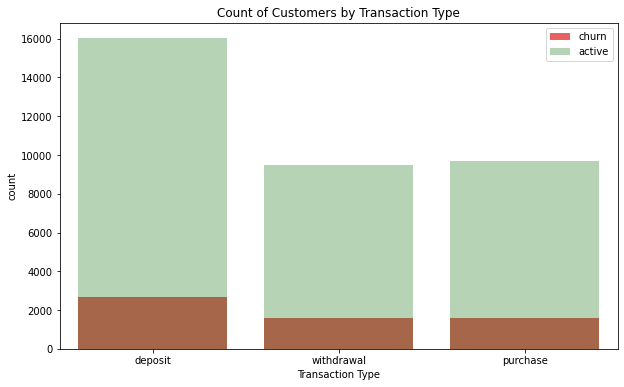

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.countplot(data=churn, x='transaction_type', color='red', ax=ax, alpha=0.7, label='churn')
sns.countplot(data=active, x='transaction_type', color='green', ax=ax, alpha=0.3, label='active')

plt.title('Count of Customers by Transaction Type')
plt.xlabel('Transaction Type')
plt.legend()
plt.show()


The countplot reveals that all transaction types generally have good retention rates, with a notable observation that 'deposit' has the highest churn distribution among them. This implies that a  number of customers who primarily engaged in deposit transactions ended up churning.

What the bank should take note of:
The bank should closely examine why customers with a 'deposit' transaction type have a relatively higher likelihood of churning. It may indicate that customers with deposit-focused activity may have unique needs or expectations that are not being adequately met. Understanding the reasons behind this trend can help the bank develop targeted strategies to retain these customers and improve their overall experience.

# Machine learning 

My machine learning model aims to predict customer churn in this banking dataset. my definition of customer Customer churn refers to customers who have not made any transactions as of the end 0f 2020 into the fresh year of 2021 and are labelled as "churned." The model aims to answer the question of which customers are likely to churn based on various features such as transaction history, region, and other relevant information. The bank can proactively retain those customers by identifying potential churners in advance.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# outlier detection using z score 

In [94]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])


In [95]:
numerical_columns

,consumer_id,region_id,node_id,consumer_id,transaction_amount,region_code
0,312,5,2,312,485.0,5
1,312,5,4,312,485.0,5
2,312,5,3,312,485.0,5
3,312,5,4,312,485.0,5
4,312,5,5,312,485.0,5
...,...,...,...,...,...,...
41071,309,5,5,309,995.0,5
41072,309,5,4,309,995.0,5
41073,309,5,1,309,995.0,5
41074,309,5,1,309,995.0,5


In [96]:
numerical_columns = ['transaction_amount', 'region_code']

In [97]:
from scipy import stats


In [98]:
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column + '_z'] = stats.zscore(data[column])
z_score_threshold = 3.0  
outliers = data[(z_scores.abs() > z_score_threshold).any(axis=1)]
print("Detected Outliers:")
print(outliers)

Detected Outliers:
Empty DataFrame
Columns: [consumer_id, region_id, node_id, start_date, end_date, consumer_id, transaction_date, transaction_type, transaction_amount, region_code, region_name, churn]
Index: []


this implies that no outliers were detected in the dataset using the Z-score method with 3.0 as  threshold. This suggests that the data points in the provided dataset do not exhibit extreme values or data points that deviate significantly from the mean. The absence of outliers can be considered a positive outcome, indicating that the data is relatively well-behaved within the chosen threshold

# Encoding / feature engineering 

In [99]:
data = data.drop(['consumer_id', 'region_name', 'region_id', 'node_id'],axis=1)  # i am dropping this column 

In [100]:
data

,start_date,end_date,transaction_date,transaction_type,transaction_amount,region_code,churn
0,2020-04-24,2021-12-31,2020-04-24,deposit,485.0,5,churned
1,2020-04-01,2020-04-23,2020-04-01,deposit,485.0,5,active
2,2020-03-16,2020-03-31,2020-03-16,deposit,485.0,5,active
3,2020-02-21,2020-03-15,2020-02-21,deposit,485.0,5,active
4,2020-02-09,2020-02-20,2020-02-09,deposit,485.0,5,active
...,...,...,...,...,...,...,...
41071,2020-03-03,2020-03-11,2020-03-03,deposit,995.0,5,active
41072,2020-02-28,2020-03-02,2020-02-28,deposit,995.0,5,active
41073,2020-02-27,2020-02-27,2020-02-27,deposit,995.0,5,active
41074,2020-02-07,2020-02-26,2020-02-07,deposit,995.0,5,active


i am encoding this data using one hot encoding , because the relationship between my  "transaction_type" and "churn" columns can be categorized as a nominal relationship.

A nominal relationship means that there is no inherent order or ranking among the categories within each column. 

In my  case:

"transaction_type" contains the categories "deposit," "withdrawal," and "purchase." These categories do not have a specific order or ranking; they are distinct types of transactions with no inherent order.

"churn" contains the categories "active" and "churn." Similarly, these categories are not ordinal; they represent different states or labels for customers' churn status.

In a nominal relationship, you typically use one-hot encoding to create binary columns for each category, preserving the categorical nature of the variable. Each category is treated as a separate, independent feature, and there is no ordinal relationship assumed. 

i also created a new columns form my existing date time column for more information

In [101]:
data_encoded = pd.get_dummies(data, columns=['transaction_type', 'churn'], prefix=['transaction_type', 'churn'])

In [102]:
# Encoding datetime columns and creating new features
data_encoded['start_date'] = pd.to_datetime(data_encoded['start_date'])
data_encoded['end_date'] = pd.to_datetime(data_encoded['end_date'])
data_encoded['transaction_date'] = pd.to_datetime(data_encoded['transaction_date'])

data_encoded['start_year'] = data_encoded['start_date'].dt.year
data_encoded['start_month'] = data_encoded['start_date'].dt.month
data_encoded['start_day'] = data_encoded['start_date'].dt.day

data_encoded['end_year'] = data_encoded['end_date'].dt.year
data_encoded['end_month'] = data_encoded['end_date'].dt.month
data_encoded['end_day'] = data_encoded['end_date'].dt.day

data_encoded['transaction_year'] = data_encoded['transaction_date'].dt.year
data_encoded['transaction_month'] = data_encoded['transaction_date'].dt.month
data_encoded['transaction_day'] = data_encoded['transaction_date'].dt.day


In [103]:
# Droping  the original datetime columns
data_encoded = data_encoded.drop(columns=['start_date', 'end_date', 'transaction_date'])

In [104]:
data_encoded

,transaction_amount,region_code,transaction_type_deposit,transaction_type_purchase,transaction_type_withdrawal,churn_active,churn_churned,start_year,start_month,start_day,end_year,end_month,end_day,transaction_year,transaction_month,transaction_day
0,485.0,5,1,0,0,0,1,2020,4,24,2021,12,31,2020,4,24
1,485.0,5,1,0,0,1,0,2020,4,1,2020,4,23,2020,4,1
2,485.0,5,1,0,0,1,0,2020,3,16,2020,3,31,2020,3,16
3,485.0,5,1,0,0,1,0,2020,2,21,2020,3,15,2020,2,21
4,485.0,5,1,0,0,1,0,2020,2,9,2020,2,20,2020,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41071,995.0,5,1,0,0,1,0,2020,3,3,2020,3,11,2020,3,3
41072,995.0,5,1,0,0,1,0,2020,2,28,2020,3,2,2020,2,28
41073,995.0,5,1,0,0,1,0,2020,2,27,2020,2,27,2020,2,27
41074,995.0,5,1,0,0,1,0,2020,2,7,2020,2,26,2020,2,7


# Feature Selection


In [105]:
X = data_encoded.drop(['churn_churned', 'churn_active'], axis=1) 
y = data_encoded['churn_churned']  

In [106]:
rf = RandomForestClassifier()
rf.fit(X, y)


RandomForestClassifier()

In [107]:
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

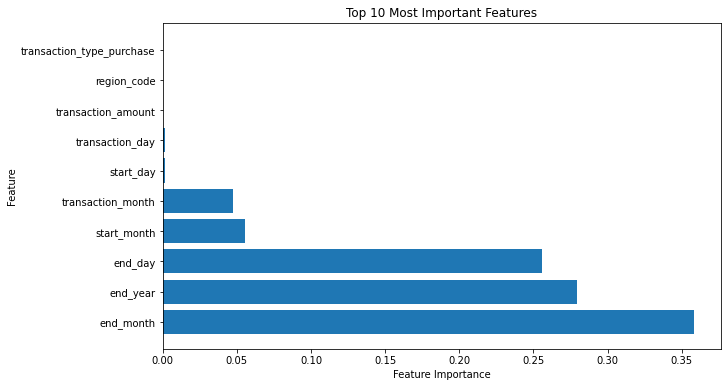

In [108]:
N = 10  
top_N_features = feature_importances_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_N_features['Feature'], top_N_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top ' + str(N) + ' Most Important Features')
plt.show()


The five most important features for predicting customer churn in the model are:

Transaction Month: The month in which the customer's transaction occurred holds significant predictive power. This suggests that there may be seasonal patterns or trends in customer behavior that impact churn.

Start Month: The month when a customer initially started their engagement with the bank is also crucial. It indicates that the timing of customer acquisition plays a role in predicting churn.

End Day: The specific day on which a customer's engagement with the bank ends is an important factor. It implies that certain days of the month may influence whether a customer decides to churn.

End Year: The year in which the customer's engagement with the bank ended is a key determinant. It could be associated with broader economic or environmental factors influencing customer churn.

End Month: Similar to the end year, the end month signifies the month in which a customer's engagement concluded. It provides insights into the temporal aspects of churn prediction.


These features highlight the significance of temporal patterns, such as the timing of transactions and customer engagement periods, in predicting churn


In [109]:
# building a random forest model based on the important features 

In [110]:
# X = data_encoded[['transaction_month', 'end_month', 'start_month', 'end_year', 'end_day']]
# y = data_encoded['churn_churned']

In [111]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


In [113]:
# best_rf = RandomForestClassifier(random_state=42, **best_params)
# best_rf.fit(X_train, y_train)


In [114]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# y_pred = best_rf.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("ROC-AUC Score:", roc_auc)

# # Classification report
# print(classification_report(y_test, y_pred))


In [115]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from sklearn.preprocessing import StandardScaler

# # Split your data
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Step 2: Cross-Validation
# rf = RandomForestClassifier(random_state=42)
# cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-Validation Scores:", cv_scores)
# print("Mean Accuracy:", cv_scores.mean())
# print("Standard Deviation:", cv_scores.std())

# # Step 3: Use Regularization Techniques (Optional)
# # You can add regularization terms (e.g., max_depth, min_samples_split) in the RandomForestClassifier parameters.

# # Step 4: Feature Selection (Optional)
# # You can perform feature selection based on importance scores if you have them.
# # Example: Select the top N most important features and use them in the model.
# selected_features = ['end_month', 'end_year', 'end_day']
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]

# # Fit the Random Forest model with selected features
# best_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2)
# best_rf.fit(X_train_selected, y_train)

# # Evaluate on the Validation Set
# y_val_pred = best_rf.predict(X_val_selected)
# accuracy = accuracy_score(y_val, y_val_pred)
# precision = precision_score(y_val, y_val_pred)
# recall = recall_score(y_val, y_val_pred)
# f1 = f1_score(y_val, y_val_pred)
# roc_auc = roc_auc_score(y_val, best_rf.predict_proba(X_val_selected)[:, 1])

# print("Validation Set Metrics:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("ROC-AUC Score:", roc_auc)


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Standard Deviation: 0.0
Validation Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0


In [116]:
# import pandas as pd
# # from sklearn.model_selection import train_test_split
# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [117]:
# # Split your data
# # X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [118]:
# # Define the base classifier (Random Forest)
# base_classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2)

# # Create a Bagging Classifier
# bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)


In [119]:
# bagging_classifier.fit(X_train, y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [120]:
# y_val_pred = bagging_classifier.predict(X_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# precision = precision_score(y_val, y_val_pred)
# recall = recall_score(y_val, y_val_pred)
# f1 = f1_score(y_val, y_val_pred)
# roc_auc = roc_auc_score(y_val, bagging_classifier.predict_proba(X_val)[:, 1])

# print("Validation Set Metrics:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("ROC-AUC Score:", roc_auc)


Validation Set Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 0.9999999999999999


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'base_estimator__max_depth': [None, 10, 20],
#     'base_estimator__min_samples_split': [2, 5, 10]
# }

# # Create the Bagging Classifier
# base_classifier = RandomForestClassifier(random_state=42)
# bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'base_estimator__max_depth': [None, 10, 20],
#     'base_estimator__min_samples_split': [2, 5, 10]
# }

# # Create the Bagging Classifier
# base_classifier = RandomForestClassifier(random_state=42)
# bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, n_jobs=-1)

# # Fit the GridSearchCV to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


In [ ]:
# # Get the best Bagging Classifier with tuned hyperparameters
# best_bagging_classifier = grid_search.best_estimator_

# # Make predictions on the test set
# y_test_pred = best_bagging_classifier.predict(X_test)
# accuracy = accuracy_score(y_test, y_test_pred)
# precision = precision_score(y_test, y_test_pred)
# recall = recall_score(y_test, y_test_pred)
# f1 = f1_score(y_test, y_test_pred)
# roc_auc = roc_auc_score(y_test, best_bagging_classifier.predict_proba(X_test)[:, 1])

# print("Test Set Metrics:")
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)
# print("ROC-AUC Score:", roc_auc)
